In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jhonascba/students_performance/main/Student_performance_data%20_.csv?token=GHSAT0AAAAAACUFS7YB6NV2GOON5Y2VEEJ6ZT5WZUA'
df = pd.read_csv(url)
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [3]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


# 1. What is the average GPA of the students by age?

In [4]:
df.groupby('Age')['GPA'].mean()

Age
15    1.898509
16    1.907534
17    1.927030
18    1.892101
Name: GPA, dtype: float64

# 2. Is there a correlation between weekly study time and GPA?

In [5]:
df[['StudyTimeWeekly', 'GPA']].corr()

,StudyTimeWeekly,GPA
StudyTimeWeekly,1.000000,0.179275
GPA,0.179275,1.000000


Interpretation: When students spend more weekly study time, their GPA also tends to go up a bit. But this link is not very strong. In other words, students who study more hours per week tend to have slightly higher GPAs, but this relationship is not very powerful.

# 3. Is there a difference in academic performance between students who participate in extracurricular activities and those who don't?

In [6]:
# GPA of students with extracurricular activities
extracurricular_mean = df.query('Extracurricular == 1')['GPA'].mean()

In [7]:
# GPA of students without extracurricular activities
no_extracurricular_mean = df.query('Extracurricular == 0')['GPA'].mean()

In [8]:
((extracurricular_mean - no_extracurricular_mean) / no_extracurricular_mean) * 100

9.630619520245599

Conclusion: There is a positive association between participation in extracurricular activities and GPA. Students involved in extracurricular activities tend to have slightly higher GPAs.

# 4. How does parental support level affect a student's grade class?

In [24]:
parental_support_levels = df['ParentalSupport'].unique()

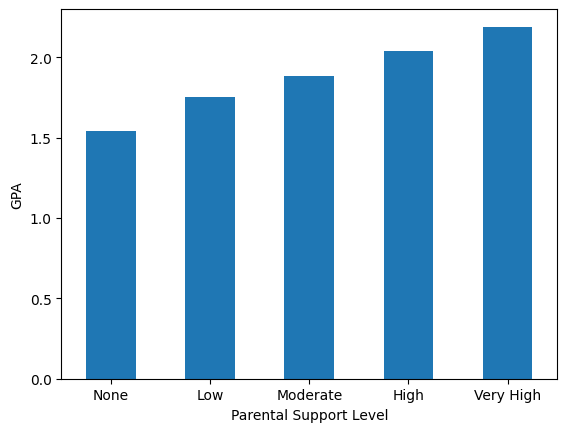

In [37]:
GPA_by_parental_suport = df.groupby('ParentalSupport')['GPA'].mean()
levels_sequence = np.arange(0, 5, 1)
GPA_by_parental_suport.plot(kind='bar', xlabel='Parental Support Level', ylabel='GPA', xticks=levels_sequence, rot=0)
plt.xticks(levels_sequence, ['None', 'Low', 'Moderate', 'High', 'Very High'])
plt.show()

Conclusion: There is a positive correlation between the level of parental support and a student's GPA. As parental involvement increases, students tend to achieve higher GPAs.

# 5. Does gender affect a student's grades?

In [42]:
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,Male,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,Male,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,Female,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,Female,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [47]:
gpa_by_gender = df.groupby('Gender')['GPA'].mean()

<Axes: xlabel='Gender', ylabel='GPA'>

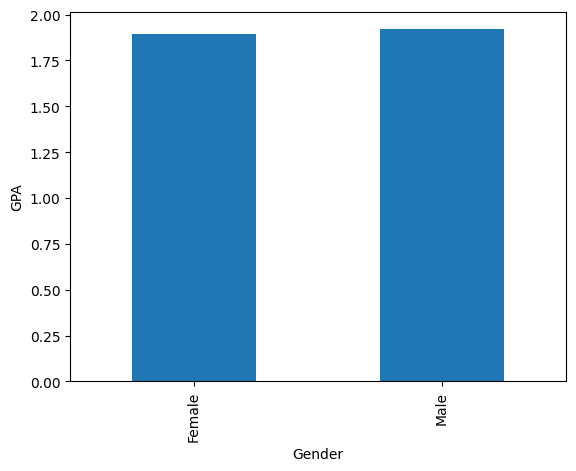

In [48]:
gpa_by_gender.plot(kind='bar', xlabel='Gender', ylabel='GPA')

Conclusion: Based on the available data, there appears to be no significant difference in grades between male and female students.